In [1]:
from google.colab import files
uploaded = files.upload()



Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop(columns='CustomerID', inplace = True)

In [6]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
df.isna().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
le.fit(df['Gender'])

LabelEncoder()

In [10]:
df['Gender'] = le.transform(df['Gender'])

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [12]:
df.shape

(200, 4)

In [13]:
import seaborn as sns

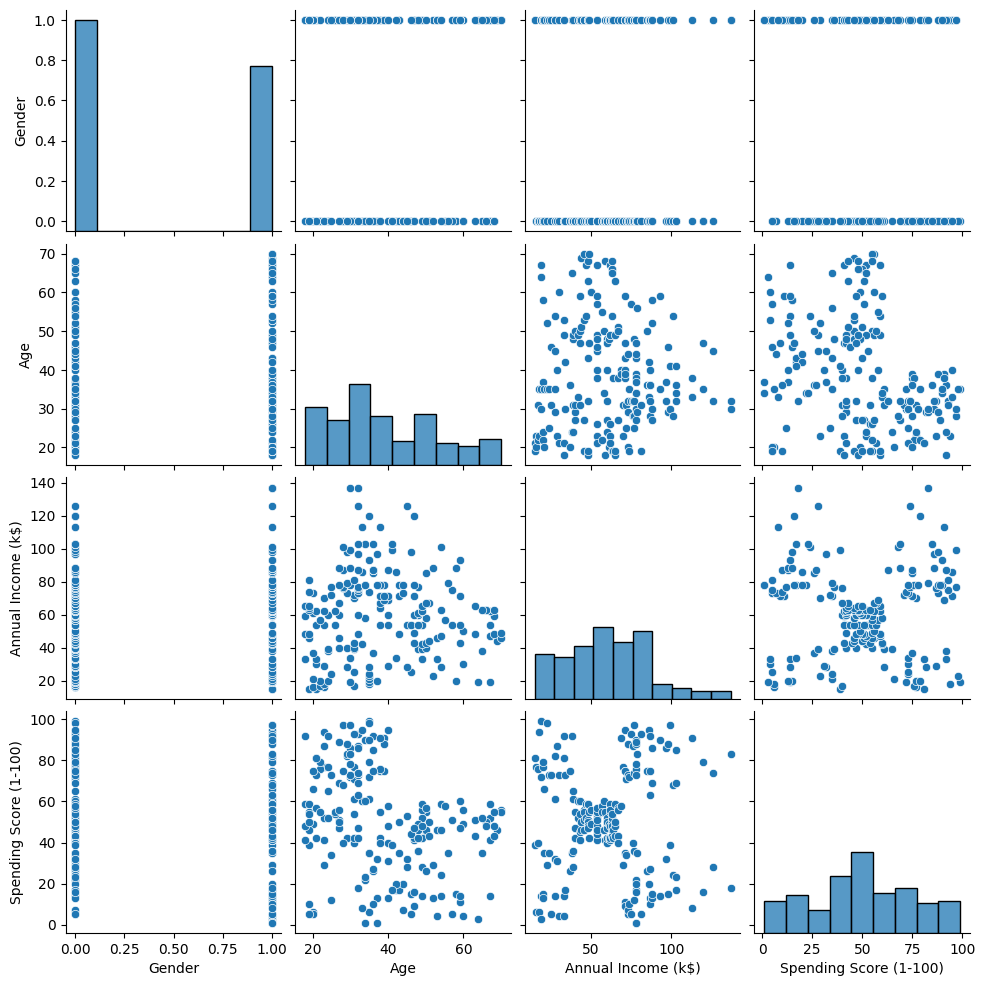

In [14]:
sns.pairplot(df)

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df_no_outliers.copy()

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
scale = StandardScaler()
df = scale.fit_transform(df)

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(n_components=2)

In [20]:
df_tsne = df.copy()

In [21]:
df = pca.transform(df)

In [22]:
from sklearn.cluster import DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
dbs = DBSCAN(eps=0.5, min_samples=5)
dbs.fit(df)

DBSCAN()

In [25]:
y_pred_dbs = dbs.labels_

<Axes: >

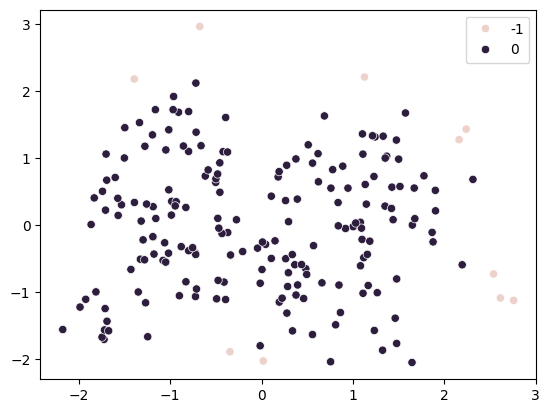

In [26]:
sns.scatterplot(x=df[:,0], y=df[:,1], hue=y_pred_dbs)

In [27]:
score_dbs = silhouette_score(df, y_pred_dbs)
print(score_dbs)

0.30559710806834994


In [28]:
SC = SpectralClustering(n_clusters=2)
SC.fit(df)

SpectralClustering(n_clusters=2)

In [29]:
y_pred_sc =SC.labels_

<Axes: >

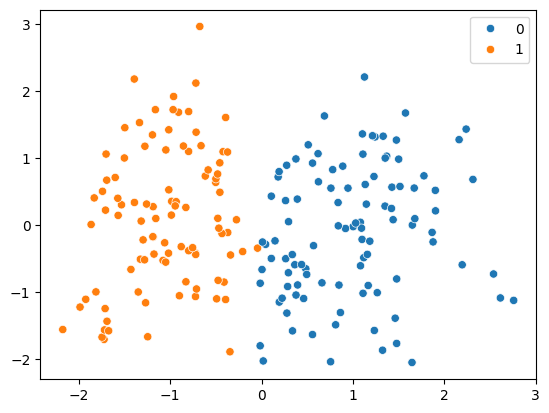

In [30]:
sns.scatterplot(x=df[:,0], y=df[:,1], hue=y_pred_sc)

In [31]:
score_sc = silhouette_score(df, y_pred_sc)
print(score_sc)

0.3985208492411688


In [32]:
gmm = GaussianMixture(n_components=2)
gmm.fit(df)

GaussianMixture(n_components=2)

In [33]:
y_pred_gmm = gmm.predict(df)

<Axes: >

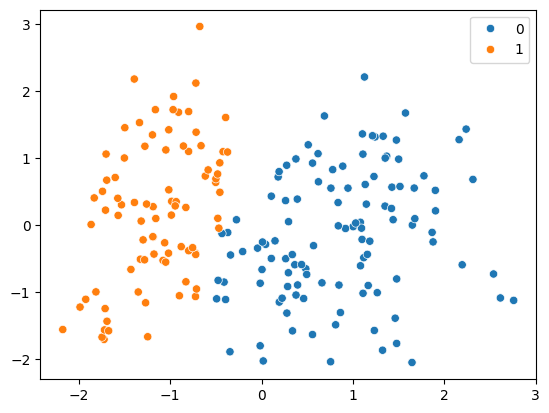

In [34]:
sns.scatterplot(x=df[:,0], y=df[:,1], hue=y_pred_gmm)

In [35]:
score_gmm = silhouette_score(df, y_pred_gmm)
print(score_gmm)

0.3859008595300872


In [36]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_tsne)

<Axes: >

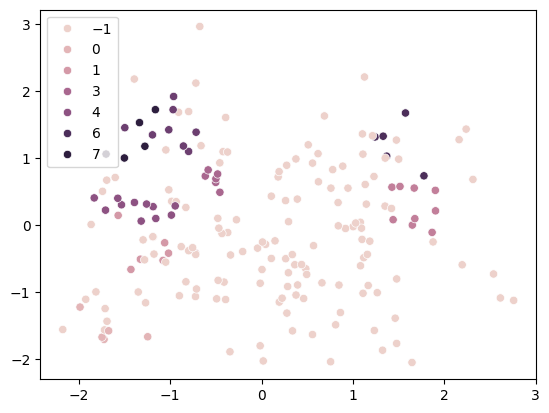

In [37]:
dbs = DBSCAN(eps=0.7, min_samples=5)
dbs.fit(df_tsne)
y_pred_dbs = dbs.labels_

sns.scatterplot(x=df[:,0], y=df[:,1], hue=y_pred_dbs)



In [38]:
score_dbs = silhouette_score(df, y_pred_dbs)
print(score_dbs)

-0.2021165563779623


<Axes: >

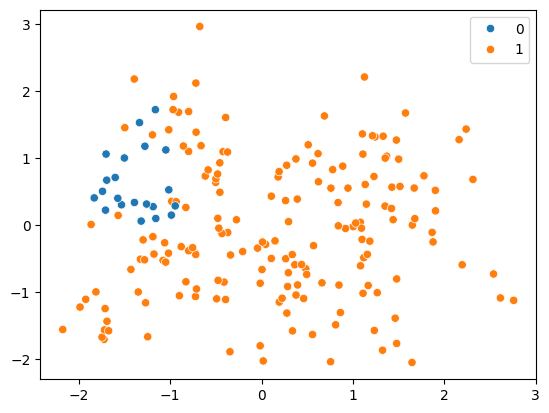

In [39]:
SC = SpectralClustering(n_clusters=2)
SC.fit(df_tsne)
y_pred_sc =SC.labels_


sns.scatterplot(x=df[:,0], y=df[:,1], hue=y_pred_sc)

In [40]:
score_sc = silhouette_score(df, y_pred_sc)
print(score_sc)

0.10970305476947541


<Axes: >

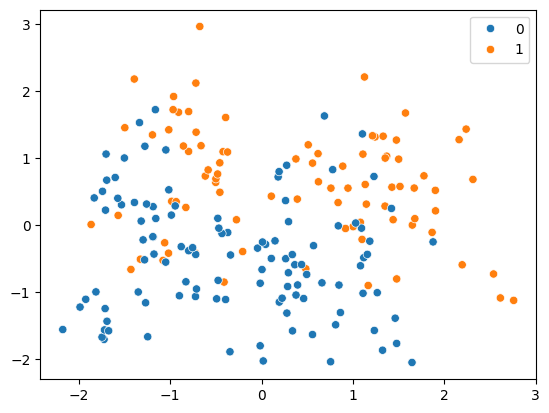

In [41]:
gmm = GaussianMixture(n_components=2)
gmm.fit(df_tsne)

y_pred_gmm = gmm.predict(df_tsne)

sns.scatterplot(x=df[:,0], y=df[:,1], hue=y_pred_gmm)

In [42]:
score_gmm = silhouette_score(df, y_pred_gmm)
print(score_gmm)

0.15458411498126906
